### Scraping MLB stats from ESPN go###

In this homework we will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2015 season 

In [296]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"

We will now scrape the table found in the above link. You can follow the class notebook to understand how to capture html table tags.

Q1) Write a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 

In [297]:
%pylab inline
import requests
import lxml.html as lh
import pandas as pd

def SCRAPE_ESPN_MLB_STATS(url):
    page=requests.get(url)
    doc = lh.fromstring(page.content)
    tr_elements = doc.xpath('//tr')
    for i in range(len(tr_elements)):
        if len(tr_elements[i])==15:
            print i, tr_elements[i].text_content()
            break

    col=[]  # collect column names into col
    T=tr_elements[1]

    i=0
    for t in T.iterchildren():
        i+=1
        name=t.text_content()
        #print '%d:"%s"'%(i,name)
        col.append((name,[]))

    for j in range(2,len(tr_elements)-4):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()

            col[i][1].append(data)
            i+=1
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df

Populating the interactive namespace from numpy and matplotlib


Run the above function to scrape season 2015 stats.

In [298]:
df_2015 = SCRAPE_ESPN_MLB_STATS(url)
df_2015.head()

1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS


,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,308,17,5509,.269,162,1480,232,.340,.797,891,852,1,.457,2518,Toronto
1,272,19,5567,.251,162,1397,212,.323,.744,764,737,2,.421,2343,NY Yankees
2,279,32,5511,.257,162,1419,172,.325,.739,751,707,3,.413,2278,Texas
3,294,33,5640,.265,162,1496,161,.325,.740,748,706,4,.415,2339,Boston
4,274,49,5572,.265,162,1479,186,.315,.748,737,702,5,.432,2409,Colorado


We will now produce plots analyzing performance of different teams on different statistical parameters

Q2) Write a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

Call the above function for the columns

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

In [300]:
def produce_plots(df, col_names):
    for col in col_names:
        fig, ax=plt.subplots(figsize=(20,10))
        ax.plot(df[col].convert_objects(convert_numeric=True), label=col)
        ax.xaxis.set_major_locator(plt.FixedLocator(df['TEAM'].keys()))
        ax.xaxis.set_major_formatter(plt.FixedFormatter(df['TEAM']))
        labels = ax.get_xticklabels()
        plt.setp(labels, rotation=30, fontsize=12)
        ax.set_ylabel(col, fontsize=25)
        ax.grid()

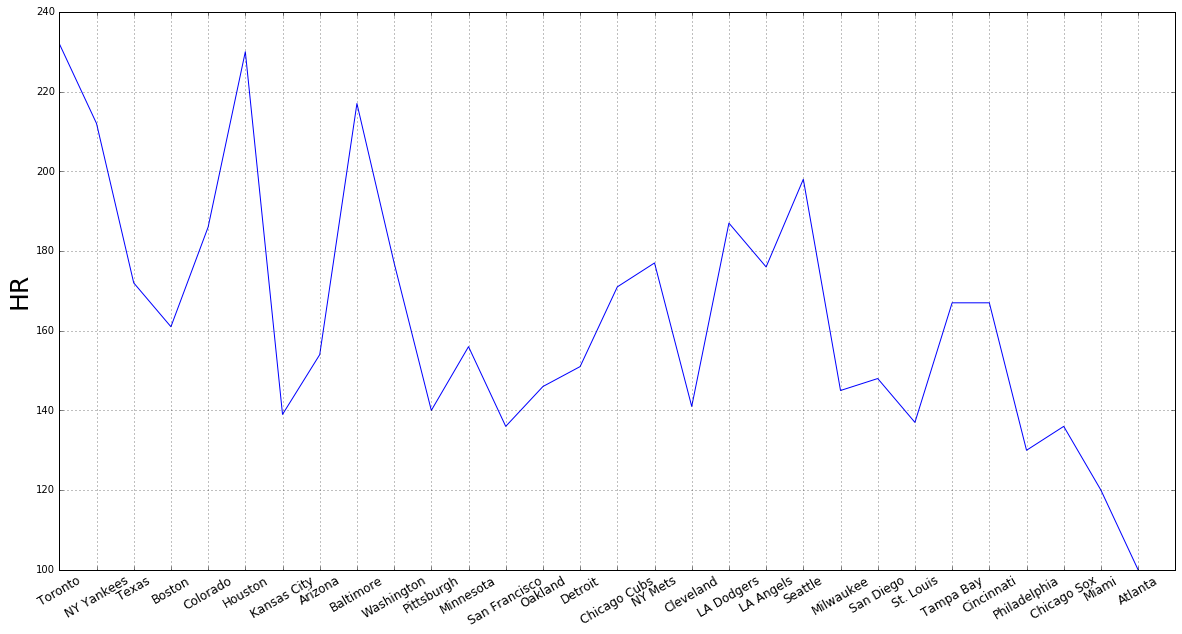

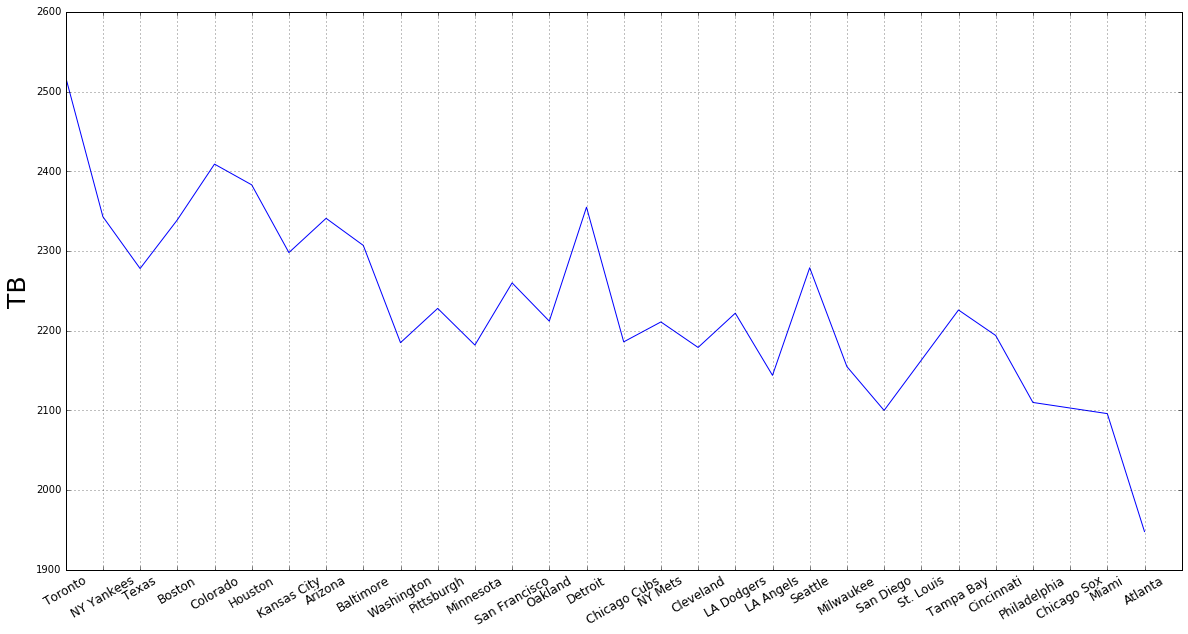

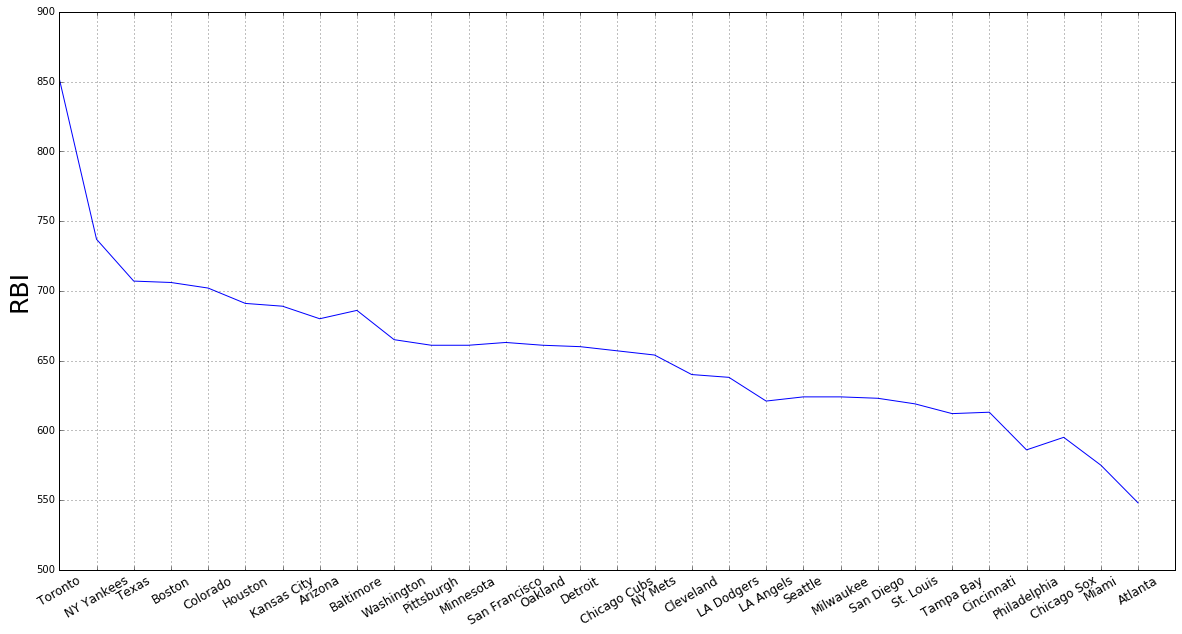

In [301]:
produce_plots(df_2015,['HR','TB','RBI'])

Q3) We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2010-2015

In [302]:
dfs={}
for year in xrange(0,6):
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    dfs[year]=SCRAPE_ESPN_MLB_STATS(link)
    dfs[year]['YEAR']=2010+year

1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS


Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Q4) Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [303]:
#combine dfs dictionary with a new column for year
combined_df =pd.concat(dfs)
combined_df=combined_df.reset_index(drop=True)
combined_df.head(10)

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM,YEAR
0,275,32,5567,.267,162,1485,201,.350,.786,859,823,1,.436,2427,NY Yankees,2010
1,358,22,5646,.268,162,1511,211,.339,.790,818,782,2,.451,2546,Boston,2010
2,295,37,5439,.247,162,1343,160,.333,.736,802,769,3,.403,2192,Tampa Bay,2010
3,293,30,5579,.272,162,1515,188,.338,.774,790,761,4,.436,2432,Cincinnati,2010
4,268,25,5635,.276,162,1556,162,.338,.757,787,740,5,.419,2360,Texas,2010
5,318,41,5568,.273,162,1521,142,.341,.762,781,749,6,.422,2347,Minnesota,2010
6,290,34,5581,.260,162,1451,166,.332,.745,772,736,7,.413,2307,Philadelphia,2010
7,270,54,5530,.263,162,1452,173,.336,.760,770,741,8,.425,2349,Colorado,2010
8,319,21,5495,.248,162,1364,257,.312,.766,755,732,9,.454,2496,Toronto,2010
9,263,21,5484,.268,162,1467,177,.332,.752,752,710,10,.420,2303,Chicago Sox,2010


Q5) Now write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

In [313]:
def produce_plots_over_seasons(combined_df, col_names):
    combined_df_sorted=combined_df.sort(columns='TEAM').reset_index(drop=True)
    fig,axx = plt.subplots(6,figsize=(20,30),sharex=True)
    fig.subplots_adjust(hspace=0.9)
    for col in col_names:
        for i in xrange(6):
            ax=axx[i]
            combined_df_filtered=combined_df_sorted.ix[combined_df_sorted['YEAR']==int('201'+str(i))].reset_index(drop=True)
            ax.plot(combined_df_filtered[col].convert_objects(convert_numeric=True),label=col)
            ax.xaxis.set_major_locator(plt.FixedLocator(combined_df_filtered['TEAM'].keys()))
            ax.xaxis.set_major_formatter(plt.FixedFormatter(combined_df_filtered['TEAM']))
            labels = ax.get_xticklabels()
            plt.setp(labels, rotation=30, fontsize=12)
            ax.set_title('Season 201'+str(i))
            ax.legend(loc="center right")
            ax.grid()

Call the above function for the columns 

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

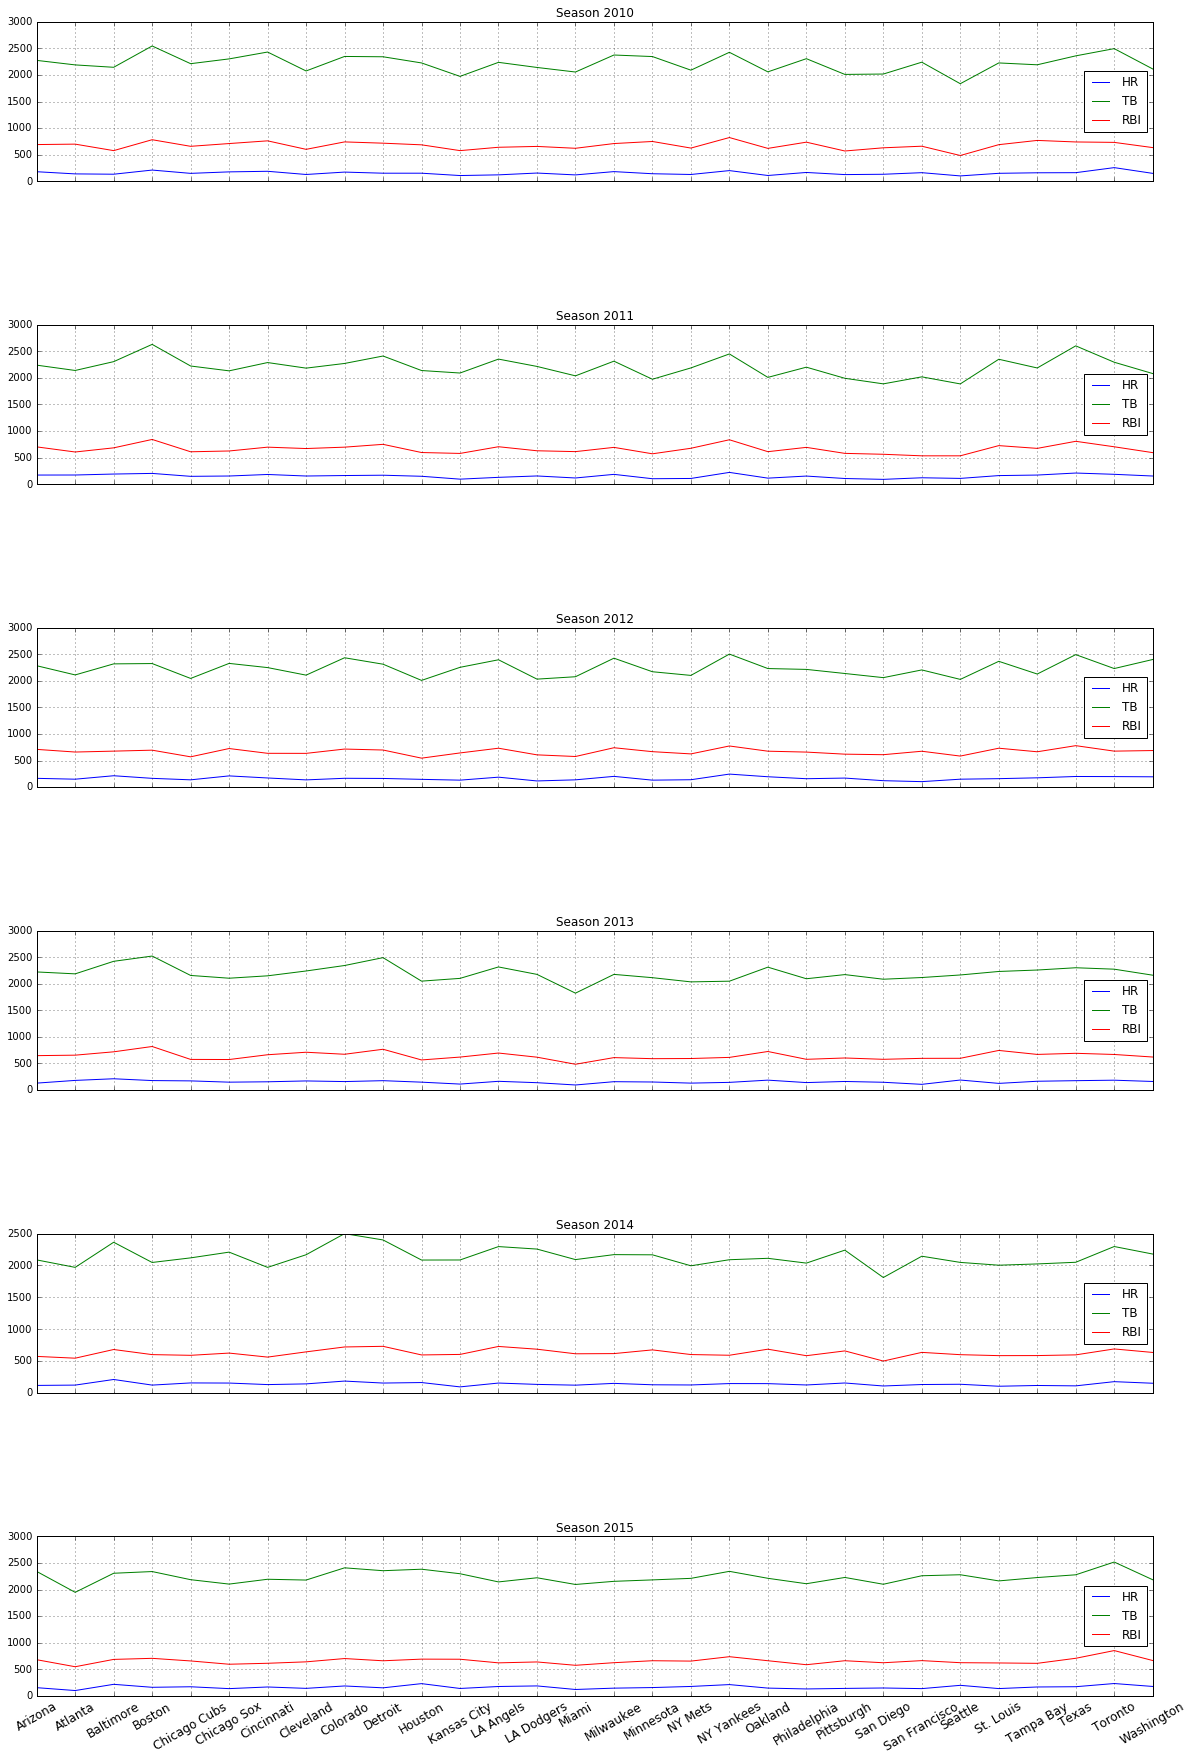

In [314]:
produce_plots_over_seasons(combined_df,['HR','TB','RBI'])